# Importing Libraries and Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Abhay\Desktop\SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
a = []
i = 0
for i in range(9994):
    if data["State"].iloc[i] not in a:
        a.append(data["State"].iloc[i])
a

['Kentucky',
 'California',
 'Florida',
 'North Carolina',
 'Washington',
 'Texas',
 'Wisconsin',
 'Utah',
 'Nebraska',
 'Pennsylvania',
 'Illinois',
 'Minnesota',
 'Michigan',
 'Delaware',
 'Indiana',
 'New York',
 'Arizona',
 'Virginia',
 'Tennessee',
 'Alabama',
 'South Carolina',
 'Oregon',
 'Colorado',
 'Iowa',
 'Ohio',
 'Missouri',
 'Oklahoma',
 'New Mexico',
 'Louisiana',
 'Connecticut',
 'New Jersey',
 'Massachusetts',
 'Georgia',
 'Nevada',
 'Rhode Island',
 'Mississippi',
 'Arkansas',
 'Montana',
 'New Hampshire',
 'Maryland',
 'District of Columbia',
 'Kansas',
 'Vermont',
 'Maine',
 'South Dakota',
 'Idaho',
 'North Dakota',
 'Wyoming',
 'West Virginia']

# Segregating the Data based on Shipping Mode

In [6]:
second_class = data[data["Ship Mode"]=="Second Class"]

In [7]:
standard_class = data[data["Ship Mode"]=="Standard Class"]

In [8]:
first_class = data[data["Ship Mode"]=="First Class"]

In [9]:
same_day = data[data["Ship Mode"]=="Same Day"]

# Segregating the Data based on Segment

In [10]:
consumer = data[data["Segment"]=="Consumer"]

In [11]:
corporate = data[data["Segment"]=="Corporate"]

In [12]:
home_office = data[data["Segment"]=="Home Office"]

In [13]:
print("Second Class Average Profit: "+str(second_class.Profit.mean()))
print("Standard Class Average Profit: "+str(standard_class.Profit.mean()))
print("First Class Average Profit: "+str(first_class.Profit.mean()))
print("Same Day Average Profit: "+str(same_day.Profit.mean()))

# No Significant difference between average profit figures of different classes

Second Class Average Profit: 29.535545192802047
Standard Class Average Profit: 27.494770023458393
First Class Average Profit: 31.839947919375827
Same Day Average Profit: 29.26659097605891


In [14]:
print("Second Class Average Sales: "+str(second_class.Sales.mean()))
print("Standard Class Average Sales: "+str(standard_class.Sales.mean()))
print("First Class Average Sales: "+str(first_class.Sales.mean()))
print("Same Day Average Sales: "+str(same_day.Sales.mean()))

# No Significant difference between average sales figures of different classes

Second Class Average Sales: 236.08923876606673
Standard Class Average Sales: 227.58306685656544
First Class Average Sales: 228.49702399219777
Same Day Average Sales: 236.39617863720073


In [15]:
print("Consumer Average Profit: "+str(consumer.Profit.mean()))
print("Corporate Average Profit: "+str(corporate.Profit.mean()))
print("Home Office Average Profit: "+str(home_office.Profit.mean()))


Consumer Average Profit: 25.83687328067804
Corporate Average Profit: 30.45666688741729
Home Office Average Profit: 33.818664329781306


In [16]:
print("Consumer Average Sales: "+str(consumer.Sales.mean()))
print("Corporate Average Sales: "+str(corporate.Sales.mean()))
print("Home Office Average Sales: "+str(home_office.Sales.mean()))


Consumer Average Sales: 223.73364380658617
Corporate Average Sales: 233.8233002649007
Home Office Average Sales: 240.97204066180612


# Plot between the different categories and Profits it yielded

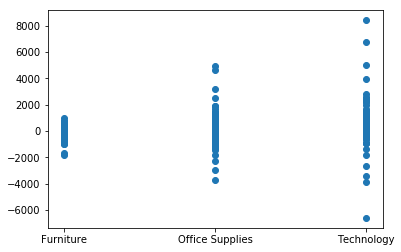

In [17]:
plt.scatter(data.Category,data.Profit)

# We can infer that Furniture doesnt yeild great amounts of profit, whereas Technology has yeilded great profits and terrible losses too

# Technology has yielded great amounts of profit but has also incurred losses, so we analyse it further

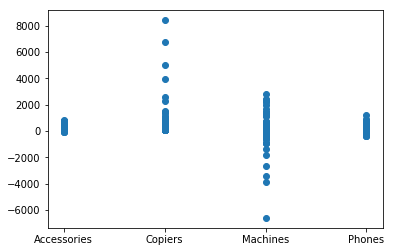

In [18]:
plt.scatter(data[data["Category"]=="Technology"]["Sub-Category"],data[data["Category"]=="Technology"]["Profit"])

In [19]:
data[data["Sub-Category"]=="Machines"].Profit.mean()

#For Machines, average profit = 29.43

29.432668695652165

In [20]:
data[data["Sub-Category"]=="Copiers"].Profit.mean()

#For Copiers, average profit = 817.91

817.9091897058825

In [21]:
data[data["Sub-Category"]=="Phones"].Profit.mean()

#For Phones, average profit = 50.07

50.073937682789655

In [22]:
data[data["Sub-Category"]=="Accessories"].Profit.mean()

#For Accessories, average profit = 54.11

54.11178799999991

# Plot between The Sub Categories of Technology and Profit

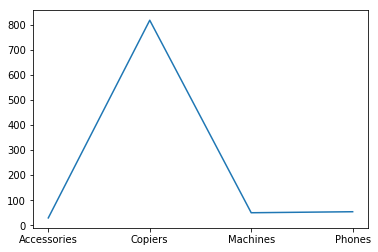

In [23]:
plt.plot(["Accessories","Copiers","Machines","Phones"],[data[data["Sub-Category"]=="Machines"].Profit.mean(),data[data["Sub-Category"]=="Copiers"].Profit.mean(),data[data["Sub-Category"]=="Phones"].Profit.mean(),data[data["Sub-Category"]=="Accessories"].Profit.mean()])

#Copiers yield a great aount of Profit.

In [25]:
def category():
    category = input("Enter Category: ")
    yesorno = input("Want to analyse with state? ")
    if yesorno == "yes":
        state = input("Enter State: ")
        data_category = data[data["Category"]==category]
        data_state = data_category[data_category["State"]==state]
        print(data_state["Sub-Category"].value_counts())
        net_profit = data_state.Profit.sum()
        print("Net Profit: "+str(net_profit))
        total_quantity = data_state["Quantity"].sum()
        print("Net Profit per Quantity: "+str(net_profit/total_quantity))
    else:
        data_category = data[data["Category"]==category]
        print(data_category["Sub-Category"].value_counts()) 
        net_profit = data_category.Profit.sum()
        print("Net Profit: "+str(net_profit))
        total_quantity = data_category["Quantity"].sum()
        print("Net Profit per Quantity: "+str(net_profit/total_quantity))

In [26]:
def category_(category,state):
        data_category = data[data["Category"]==category]
        data_state = data_category[data_category["State"]==state]
        print(data_state["Sub-Category"].value_counts())
        
       

In [41]:
category()

Enter Category: Furniture
Want to analyse with state? no
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64
Net Profit: 18451.272800000006
Net Profit per Quantity: 2.298364823119084


In [28]:
data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [37]:
def category_overview(category):
    b= []
    for i in range(49):
        state = a[i]
        data_category = data[data["Category"]==category]
        data_state = data_category[data_category["State"]==state]
        net_profit = data_state.Profit.sum()
        total_quantity = data_state["Quantity"].sum()
        net_profit_per_quantity = net_profit/total_quantity
        b.append(net_profit_per_quantity)
    minimum = b[0]
    j = 1
    while j<49:
        if b[j]<minimum:
            minimum = b[j]
        j = j+1
    values = 0
    for values in range(49):
        if b[values] == minimum:
            break
    maximum = b[0]
    j = 1
    while j<49:
        if b[j]>maximum:
            maximum = b[j]
        j = j+1
    value = 0
    for value in range(49):
        if b[value] == maximum:
            break
    print("Least Net Profit Per Quantity: "+a[values]+" with the score of "+str(b[values]))
    category_(category,a[values])
    print("Most Net Profit Per Quantity: "+a[value]+" with the score of "+str(b[value]))
    category_(category,a[value])
    plt.plot(b,a,'bo')
    plt.rcParams['figure.figsize'] = (10,20)

# Below is the overview of the entire category, and plot of Net Profit per Quantity to the Individual States 

C:\Users\Abhay\Documents\New folder\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Least Net Profit Per Quantity: Texas with the score of -8.083794432361897
Binders       153
Paper         147
Storage        83
Art            71
Appliances     47
Envelopes      30
Labels         30
Fasteners      24
Supplies       19
Name: Sub-Category, dtype: int64
Most Net Profit Per Quantity: Minnesota with the score of 32.28423029045643
Binders       16
Storage       14
Paper         11
Appliances     6
Art            6
Labels         6
Envelopes      2
Fasteners      2
Supplies       1
Name: Sub-Category, dtype: int64


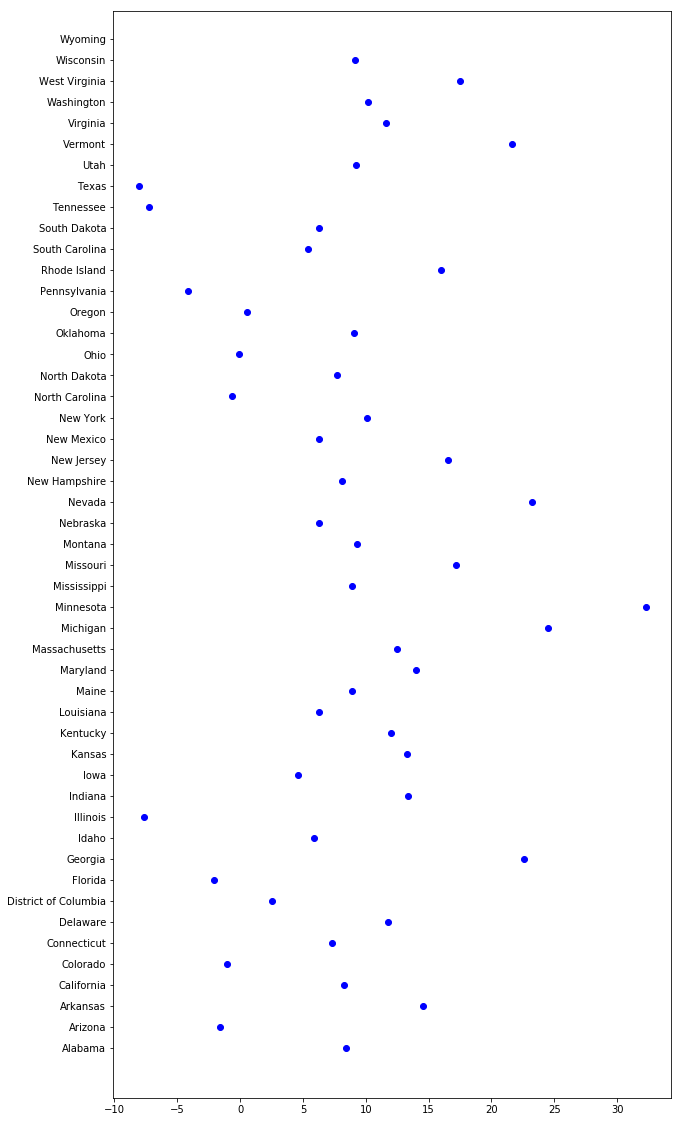

In [38]:
category_overview("Office Supplies")

C:\Users\Abhay\Documents\New folder\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Least Net Profit Per Quantity: West Virginia with the score of -25.6512
Tables    1
Name: Sub-Category, dtype: int64
Most Net Profit Per Quantity: Vermont with the score of 148.990875
Chairs       1
Bookcases    1
Name: Sub-Category, dtype: int64


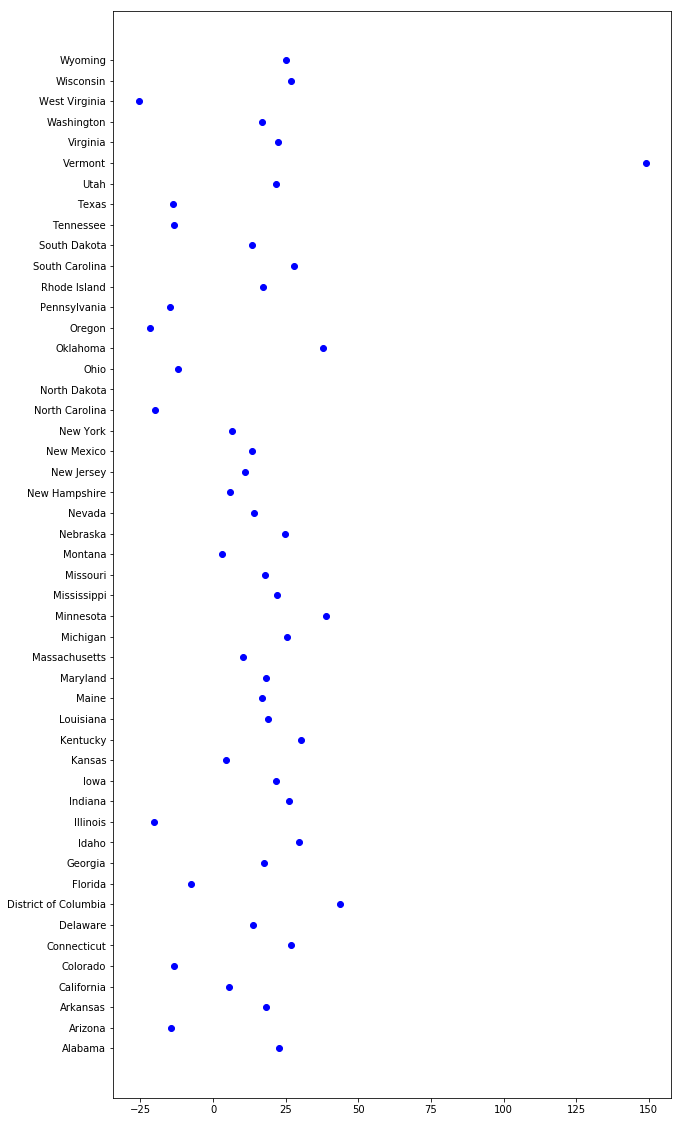

In [39]:
category_overview("Furniture")